Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


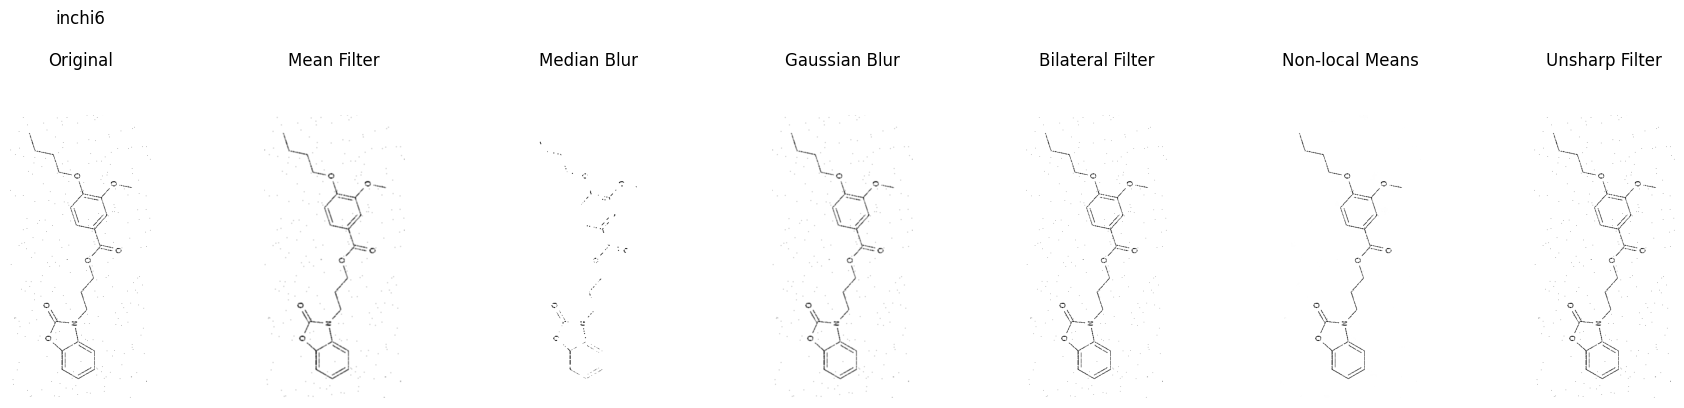

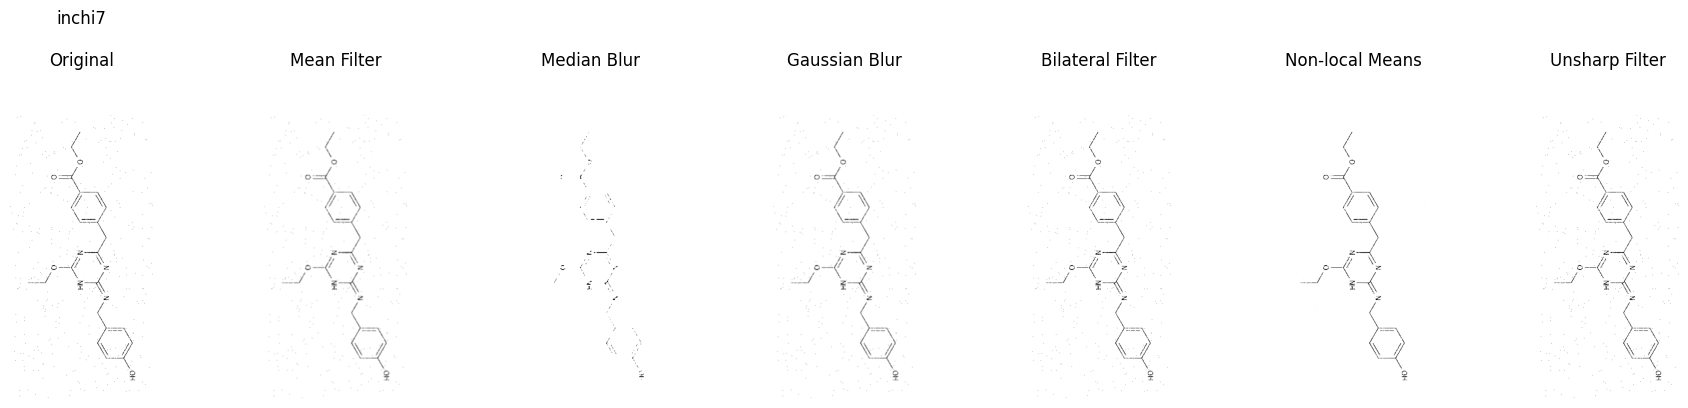

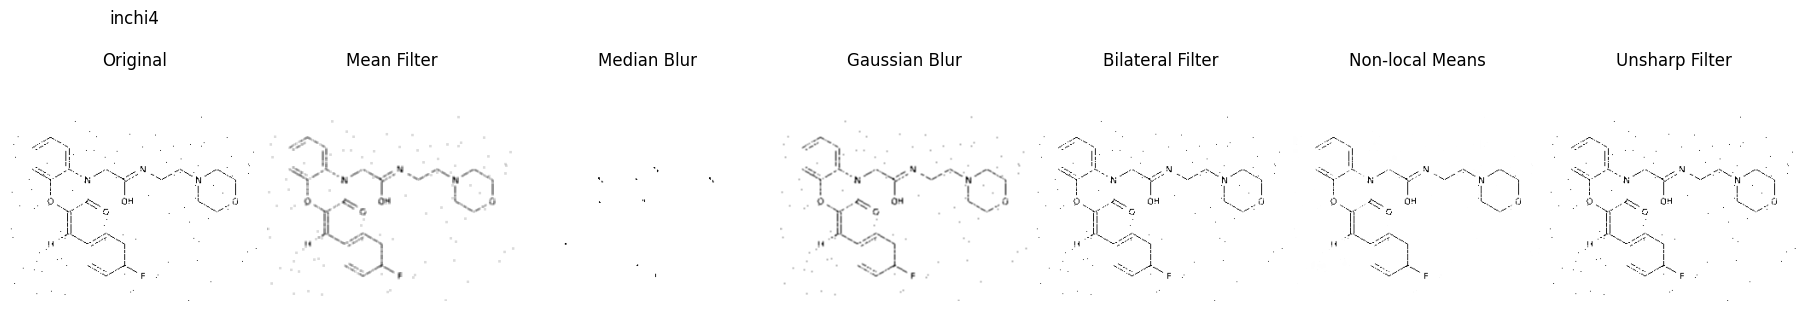

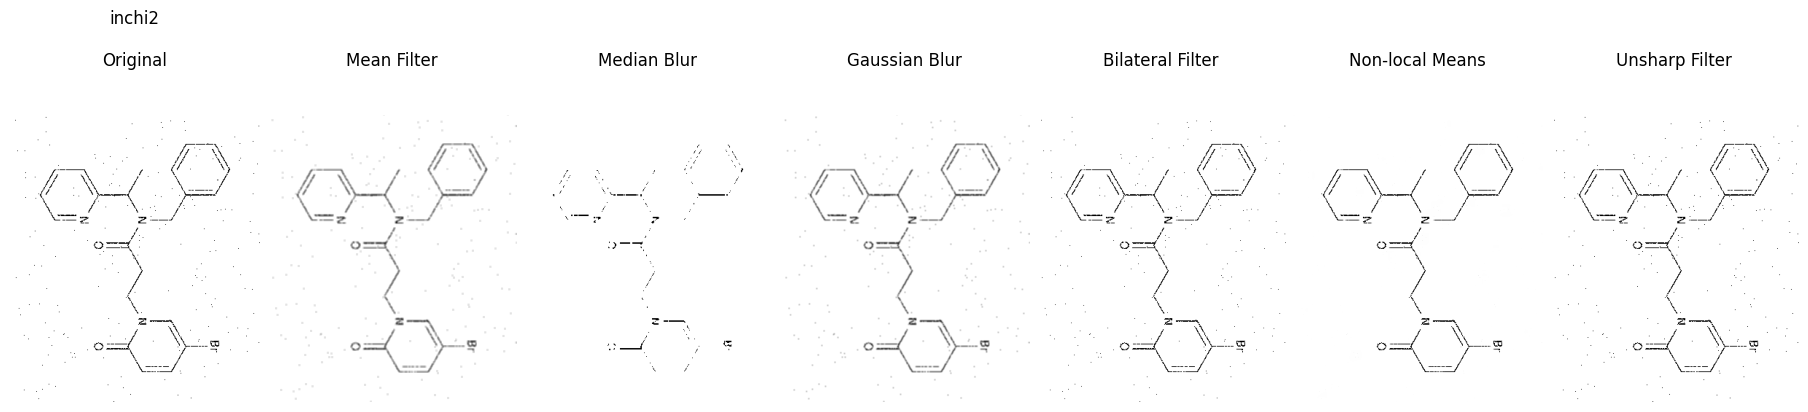

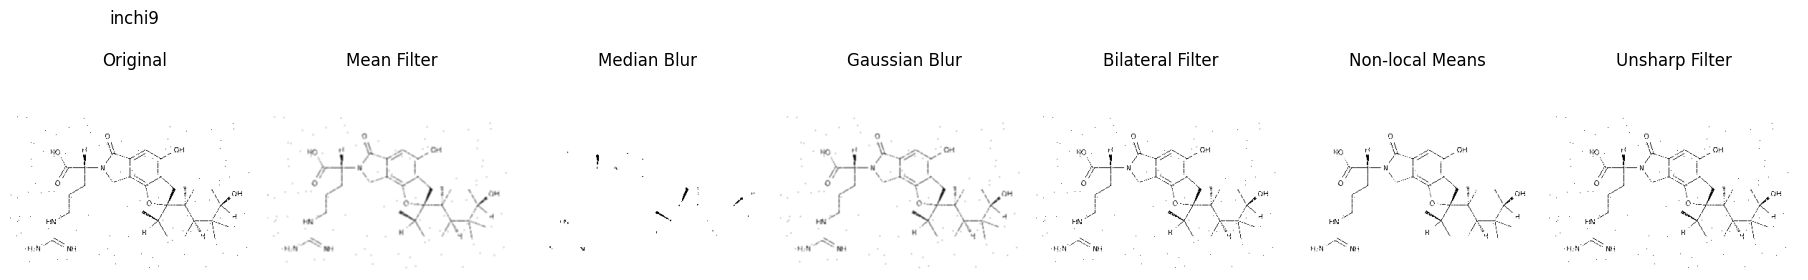

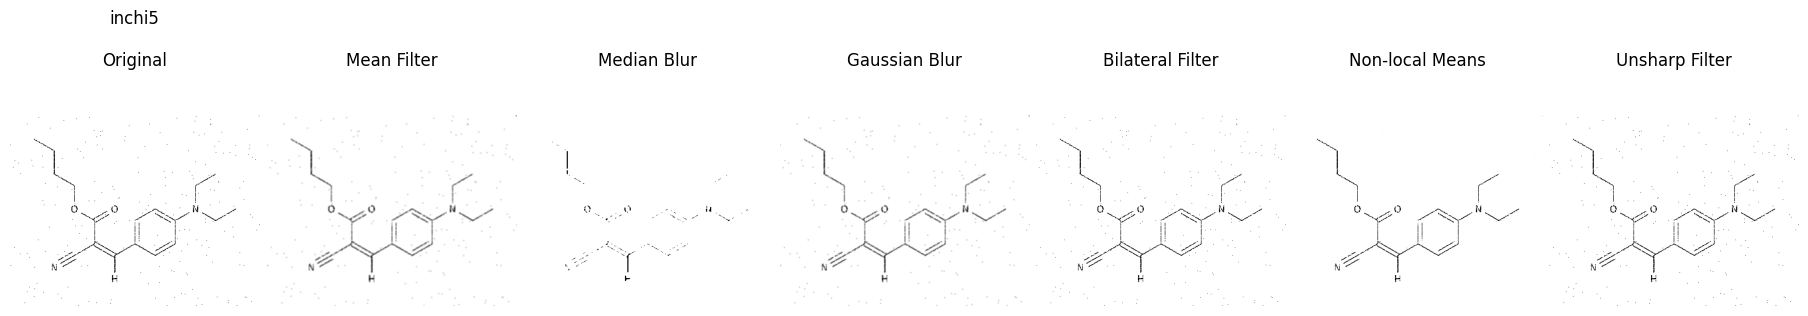

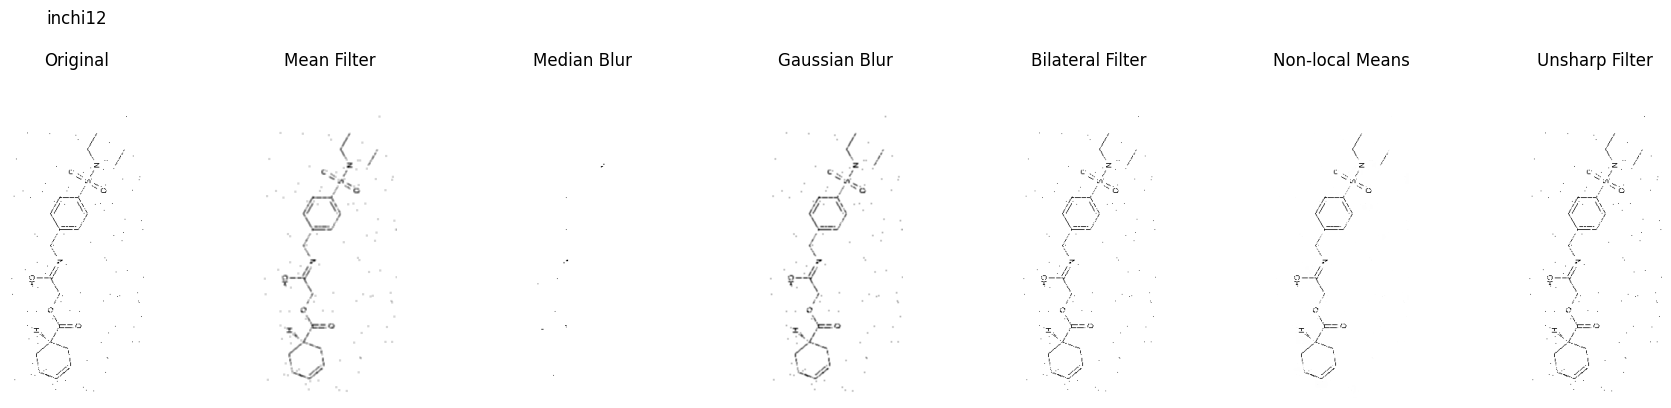

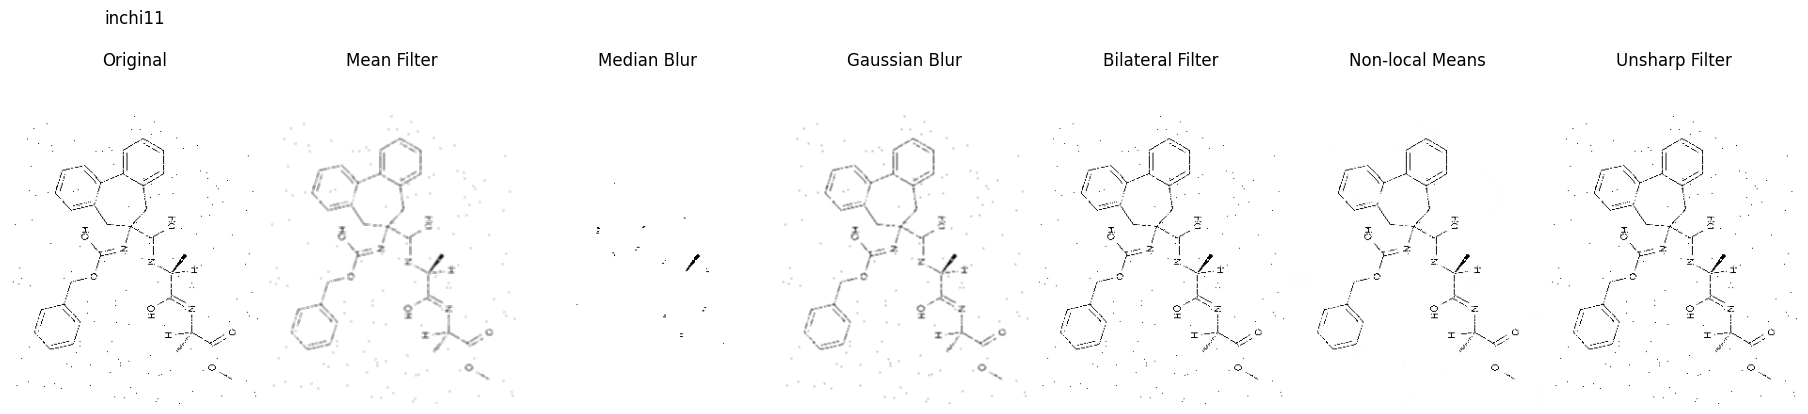

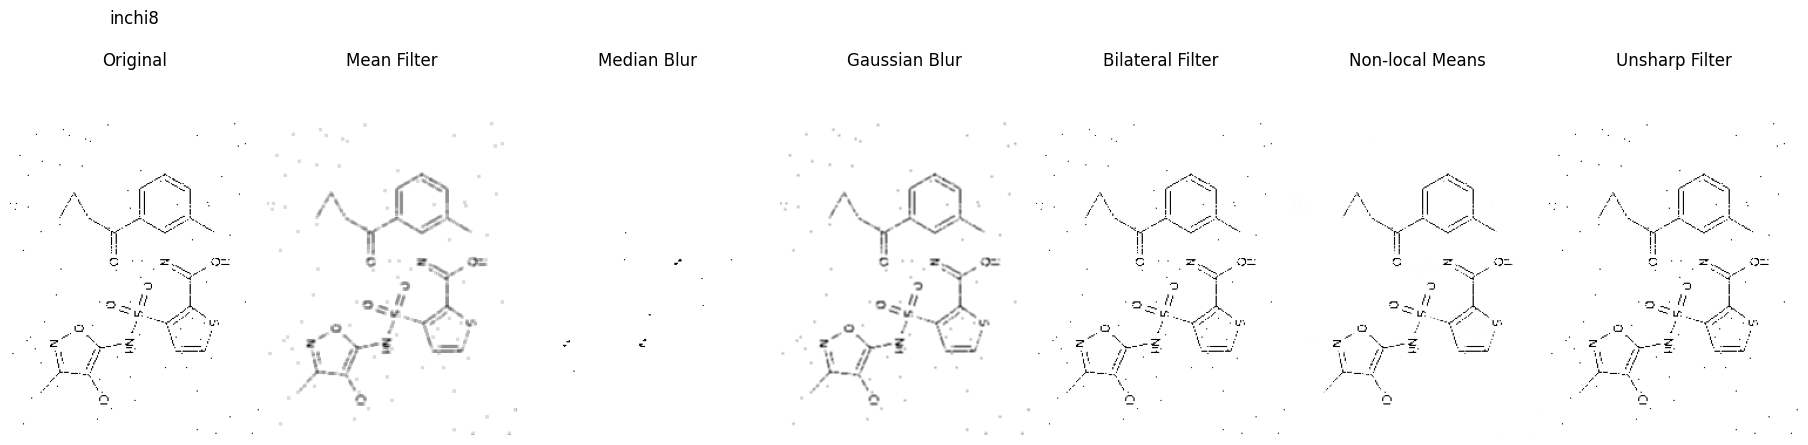

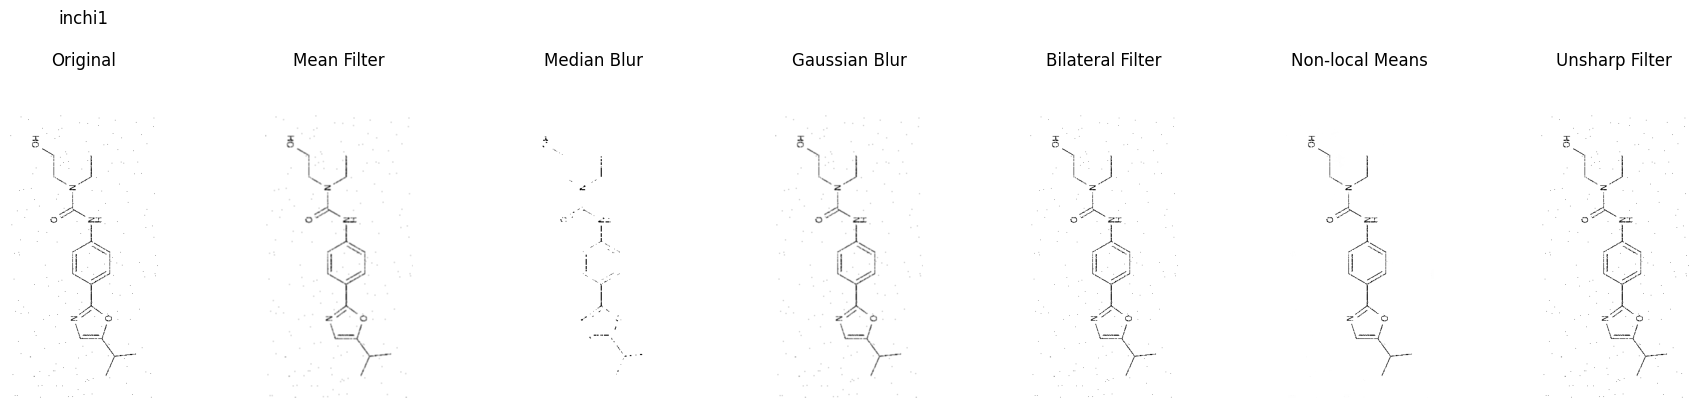

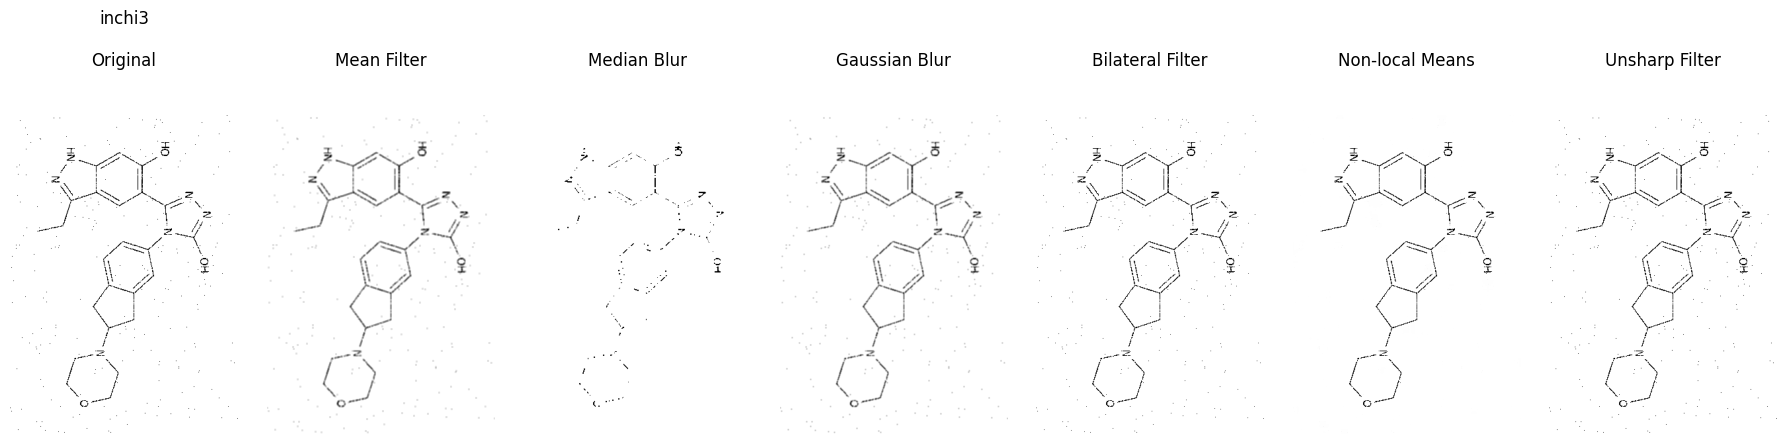

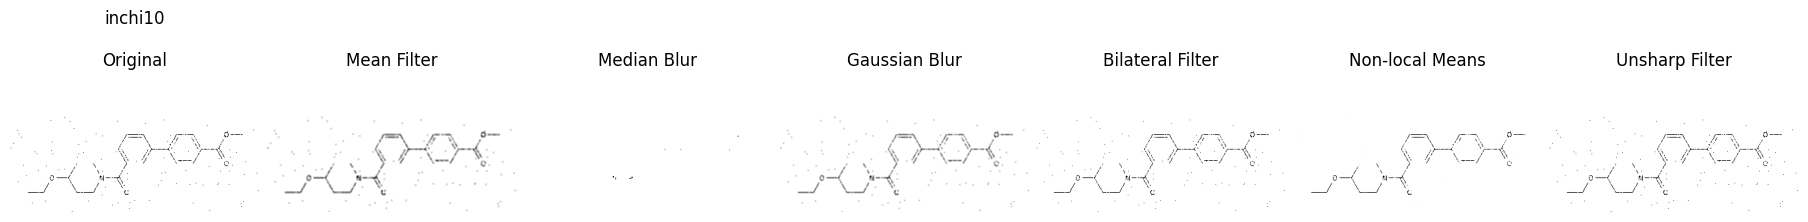

SSIM Scores for /content/drive/My Drive/a3-digital-image-processing-tmehtiyev2019/input_pictures/noisy/chemical/inchi6.png:
Mean Filter: 0.8890917622774946
Median Blur: 0.8882627201498426
Gaussian Blur: 0.9217507805873659
Bilateral Filter: 0.9994129186456125
Non-local Means: 0.9399310019809851
Unsharp Filter: 1.0
Best Filter: Unsharp Filter
Worst Filter: Median Blur

SSIM Scores for /content/drive/My Drive/a3-digital-image-processing-tmehtiyev2019/input_pictures/noisy/chemical/inchi7.png:
Mean Filter: 0.8824711763833398
Median Blur: 0.8811567871015794
Gaussian Blur: 0.9171517477574006
Bilateral Filter: 0.9993600609307256
Non-local Means: 0.9326826066375827
Unsharp Filter: 1.0
Best Filter: Unsharp Filter
Worst Filter: Median Blur

SSIM Scores for /content/drive/My Drive/a3-digital-image-processing-tmehtiyev2019/input_pictures/noisy/chemical/inchi4.png:
Mean Filter: 0.8379685925197135
Median Blur: 0.8183894403630794
Gaussian Blur: 0.8842838877549858
Bilateral Filter: 0.9994334771267849
N

In [2]:
from google.colab import drive
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Mount Google Drive
drive.mount('/content/drive')

def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image at path: {path}")
    return image

def apply_filters(image):
    kernel_size = 3  # Kernel size for mean, median, and Gaussian blur
    mean_kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)

    filters = {
        'Mean Filter': cv2.filter2D(image, -1, mean_kernel),
        'Median Blur': cv2.medianBlur(image, kernel_size),
        'Gaussian Blur': cv2.GaussianBlur(image, (kernel_size, kernel_size), 0),
        'Bilateral Filter': cv2.bilateralFilter(image, 9, 75, 75),
        'Non-local Means': cv2.fastNlMeansDenoising(image, None, 30, 7, 21),
    }

    gaussian_blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    filters['Unsharp Filter'] = cv2.addWeighted(image, 1.5, gaussian_blurred, -0.5, 0)

    return filters

def analyze_effect(original, filtered):
    ssim_scores = {name: ssim(original, img, data_range=original.max() - original.min()) for name, img in filtered.items()}
    return ssim_scores

def show_images_and_save_outputs(original, filtered_images, original_path, output_dir):
    number_of_filters = len(filtered_images)
    # Increase the figure height to accommodate the original image name
    plt.figure(figsize=(3 * number_of_filters, 3 + 1))  # Adjusted height for title

    # Display original image
    plt.subplot(1, number_of_filters + 1, 1)
    plt.imshow(original, cmap='gray')
    # Use the image filename as title above the 'Original' title
    original_title = os.path.basename(original_path).split('.')[0]
    plt.title(f'{original_title}\n\nOriginal\n\n')
    plt.axis('off')

    # Display filtered images and save them
    for i, (filter_name, image) in enumerate(filtered_images.items(), 2):
        plt.subplot(1, number_of_filters + 1, i)
        plt.imshow(image, cmap='gray')
        plt.title(f'{filter_name}\n\n')
        plt.axis('off')

        # Create directories if they don't exist
        os.makedirs(output_dir, exist_ok=True)

        # Save the output images
        basename = os.path.splitext(original_title)[0]
        output_filename = f"{basename}_{filter_name.replace(' ', '_')}_output.png"
        output_path = os.path.join(output_dir, output_filename)
        cv2.imwrite(output_path, image)

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.show()

def process_images(image_paths, output_dir):
    results = {}
    for path in image_paths:
        original = load_image(path)
        filtered_images = apply_filters(original)
        ssim_scores = analyze_effect(original, filtered_images)
        show_images_and_save_outputs(original, filtered_images, path, output_dir)
        results[path] = ssim_scores
    return results

def main():
    # Input and output directories on Google Drive
    base_input_dir = '/content/drive/My Drive/a3-digital-image-processing-tmehtiyev2019/input_pictures/noisy/chemical/'
    base_output_dir = '/content/drive/My Drive/a3-digital-image-processing-tmehtiyev2019/output_pictures/noisy/chemical/'
    os.makedirs(base_output_dir, exist_ok=True)

    # Retrieve image paths
    image_paths = [os.path.join(base_input_dir, f) for f in os.listdir(base_input_dir) if f.endswith('.png')]

    # Process and save results
    results = process_images(image_paths, base_output_dir)

    # Print results
    for path, scores in results.items():
        print(f"SSIM Scores for {path}:")
        for name, score in scores.items():
            print(f"{name}: {score}")

        best_filter = max(scores, key=scores.get)
        worst_filter = min(scores, key=scores.get)
        print(f"Best Filter: {best_filter}")
        print(f"Worst Filter: {worst_filter}\n")

if __name__ == '__main__':
    main()
